<hr style="border: 3px solid purple;">
<hr style="border: 3px solid purple;">

# 🧑‍🏫 **Project Overview: Synthetic Forex Data Generation Using GANs**

### 📚 **Project Objective**
The objective of this project is to generate synthetic Forex data using Generative Adversarial Networks (GANs). The synthetic data can be used for backtesting trading strategies, portfolio optimization, or any other financial application requiring realistic yet privacy-preserving data.

### 📊 **Dataset Overview**
- **Dataset**: Forex data (EUR/USD) with 1-minute intervals.
- **Features**: Date, time, open, high, low, close, volume, etc.
- **File Path**: `"/content/DAT_MT_EURUSD_M1_202409.csv"`

---

### 🔧 **Data Preprocessing Steps**

1. **Loading the Data**
    - The dataset is loaded using pandas with the `pd.read_csv()` function.

2. **Initial Exploration**
    - **Head of the Dataset**: Display the first few rows to understand the data structure.
    - **Info**: Provides basic info about the dataset including column types and non-null counts.
    - **Summary Statistics**: Describes the statistical properties of numerical columns.
    - **Missing Values**: Checks for missing data and how to handle them.
    - **Duplicate Rows**: Identifies and removes duplicate rows.

3. **Data Visualization**
    - **Histograms**: Plots the distribution of numeric columns using seaborn.
    - **Correlation Heatmap**: Visualizes the correlation between numeric columns to identify relationships.
    - **Scatter Plots**: Plots scatter plots to visually analyze the relationships between the first numeric column and others.

4. **Data Cleaning**
    - **Removing Duplicates**: Ensures the dataset does not contain duplicate rows.
    - **Handling Missing Values**: Drops rows with missing data.
    - **Outlier Detection**: Uses the IQR method to identify and remove outliers in the data.
    - **Scaling**: Scales the numeric columns using StandardScaler to normalize the data between 0 and 1.

5. **Saving Processed Data**
    - The cleaned and scaled dataset is saved to a new CSV file: `processed_forex_data.csv`.

---

### 🤖 **Building the GAN Model**

1. **Data Preparation for GAN**
    - **Drop Date/Time Columns**: Removes unnecessary columns (`"2024.09.23"`, `"00:00"`) before training the GAN.
    - **Normalization**: Scales the data to a range of [-1, 1] to improve GAN performance.
    - **Data Type**: Ensures that the data is of type `float32` for compatibility with TensorFlow.

2. **Model Architecture**
    - **Generator Model**: A Sequential neural network with layers:
        - Dense layers with LeakyReLU activations.
        - Outputs the same shape as the input data using the `tanh` activation function.
    - **Discriminator Model**: A binary classifier that distinguishes between real and fake data.
        - Uses Dense layers with LeakyReLU activations.
        - Final output is a single neuron with sigmoid activation (real vs fake).
    - **GAN Model**: Combines the generator and discriminator in a Sequential model, with the generator creating fake data and the discriminator classifying it.

3. **Model Compilation**
    - **Discriminator**: Compiled with binary cross-entropy loss and Adam optimizer.
    - **GAN**: Compiled with the generator and the discriminator (discriminator is frozen during training).

4. **Training the GAN**
    - **Epochs**: The model is trained for 10 epochs.
    - **Batch Size**: A batch size of 64 is used, with half the batch for real data and the other half for fake data.
    - **Training Loop**:
        - The discriminator is trained on both real and fake data.
        - The generator is trained to produce data that the discriminator classifies as real.

---

### 📉 **Loss Plotting**

- During training, the losses of the discriminator (D) and generator (G) are tracked and plotted for each epoch. This helps monitor the training progress and model stability.

---

### 🎯 **Results and Evaluation**

1. **Loss Curves**
    - A graph showing the discriminator and generator losses over epochs to visualize the learning process.

2. **Generated Data Comparison**
    - A plot comparing the first instance of synthetic data generated by the GAN and the original data for visual evaluation of the model's output.

---

### 📥 **Conclusion**
- The project demonstrates the use of GANs for generating synthetic Forex data.
- The resulting synthetic data can be used for various financial applications such as testing trading strategies.
- Further improvements could be made by fine-tuning the model, adding more layers, or experimenting with different GAN architectures like Wasserstein GANs (WGAN).

---

### 💡 **Key Takeaways**
- **Data Preprocessing**: Ensuring data quality is crucial for training successful machine learning models, especially for time-series data like Forex.
- **GANs**: Powerful tool for generating synthetic data, which is particularly useful in domains like finance where real data might be scarce or sensitive.
- **Loss Monitoring**: Tracking the losses during training helps in adjusting hyperparameters to improve the model's performance.

---

### 🛠 **Next Steps**
- You can experiment with different GAN architectures, hyperparameters, or data sources to further explore synthetic data generation.

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

In [197]:
# Suppress all warnings

In [198]:
import warnings

In [199]:
warnings.filterwarnings("ignore")

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

In [200]:
import pandas as pd

In [201]:
import numpy as np

In [202]:
import matplotlib.pyplot as plt

In [203]:
import seaborn as sns

In [204]:
from sklearn.preprocessing import StandardScaler

In [205]:
from tensorflow.keras.models import Sequential

In [206]:
from tensorflow.keras.layers import Dense, LeakyReLU

In [207]:
from tensorflow.keras.optimizers import Adam

In [208]:
from tensorflow.keras import initializers

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 📂 **Step 1: Loading the Dataset**

In this step, we load the Forex data into a pandas DataFrame for exploration. This helps us ensure that the data is available and correctly formatted for analysis.

- **Objective**: Load the dataset from the specified path.
- **What We Achieve**: Read the raw CSV file into a DataFrame.

In [209]:
# File path

In [210]:
file_path = "/content/DAT_MT_EURUSD_M1_202409.csv"

In [211]:
# Load the dataset

In [212]:
data = pd.read_csv(file_path)

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 🔍 **Step 2: Initial Exploration of the Data**

Before any analysis or modeling, we need to understand the dataset. This involves checking the basic structure, summary statistics, missing values, and duplicate records.

- **Objective**: Inspect data structure, summary statistics, and check for missing or duplicate values.
- **What We Achieve**:
  - Understand data types, column names, and presence of any issues (e.g., missing values, duplicates).
  - Identify trends, distributions, and initial data quality issues.

In [213]:
# Display the first few rows

In [214]:
print("Head of the dataset:")
print(data.head(), "\n")

Head of the dataset:
   2024.09.23  00:00  1.116150  1.116150.1  1.116090  1.116100  0
0  2024.09.23  00:01   1.11609     1.11610   1.11600   1.11610  0
1  2024.09.23  00:02   1.11610     1.11615   1.11610   1.11615  0
2  2024.09.23  00:03   1.11616     1.11616   1.11614   1.11614  0
3  2024.09.23  00:04   1.11613     1.11614   1.11612   1.11614  0
4  2024.09.23  00:05   1.11615     1.11615   1.11614   1.11615  0 



In [215]:
# Display information about the dataset

In [216]:
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30486 entries, 0 to 30485
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2024.09.23  30486 non-null  object 
 1   00:00       30486 non-null  object 
 2   1.116150    30486 non-null  float64
 3   1.116150.1  30486 non-null  float64
 4   1.116090    30486 non-null  float64
 5   1.116100    30486 non-null  float64
 6   0           30486 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [217]:
# Display summary statistics

In [218]:
print("\nSummary Statistics:")
print(data.describe(), "\n")


Summary Statistics:
           1.116150    1.116150.1      1.116090      1.116100        0
count  30486.000000  30486.000000  30486.000000  30486.000000  30486.0
mean       1.110449      1.110508      1.110389      1.110448      0.0
std        0.005014      0.005020      0.005008      0.005014      0.0
min        1.100210      1.100420      1.100190      1.100210      0.0
25%        1.106060      1.106120      1.105990      1.106050      0.0
50%        1.111190      1.111230      1.111150      1.111190      0.0
75%        1.114330      1.114450      1.114250      1.114330      0.0
max        1.121220      1.121400      1.121070      1.121220      0.0 



In [219]:
# Check for missing values

In [220]:
print("\nMissing Values:")
print(data.isnull().sum(), "\n")


Missing Values:
2024.09.23    0
00:00         0
1.116150      0
1.116150.1    0
1.116090      0
1.116100      0
0             0
dtype: int64 



In [221]:
# Check for duplicate rows

In [222]:
print("\nDuplicate Rows:")
print(data.duplicated().sum(), "\n")


Duplicate Rows:
0 



<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 📊 **Step 3: Data Visualization**

Visualization helps reveal patterns and relationships in the data. Here, we use histograms to inspect distributions, heatmaps to visualize correlations, and scatter plots to check for relationships between variables.

- **Objective**: Visualize distributions, correlations, and relationships.
- **What We Achieve**:
  - Identify skewness, distributions, and relationships between variables.
  - Use heatmaps to understand how different features are correlated.

In [223]:
# Plot histograms for numeric columns

In [224]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

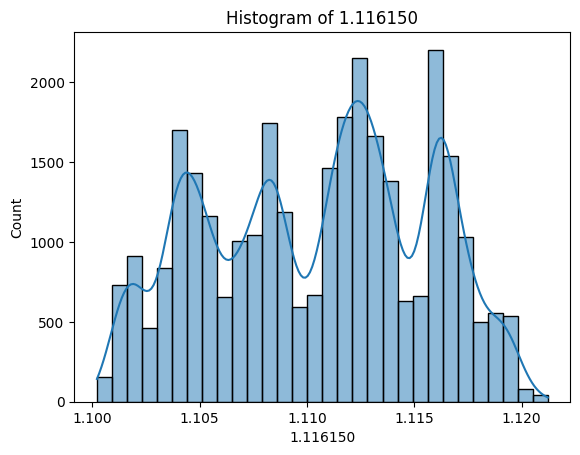

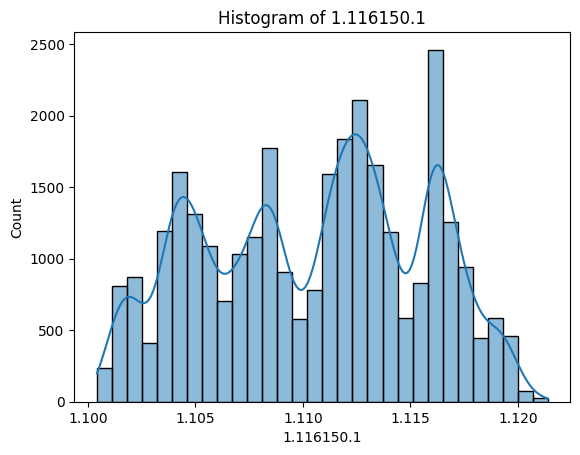

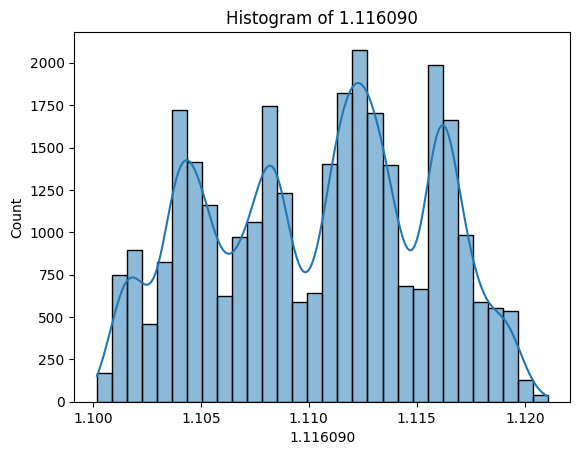

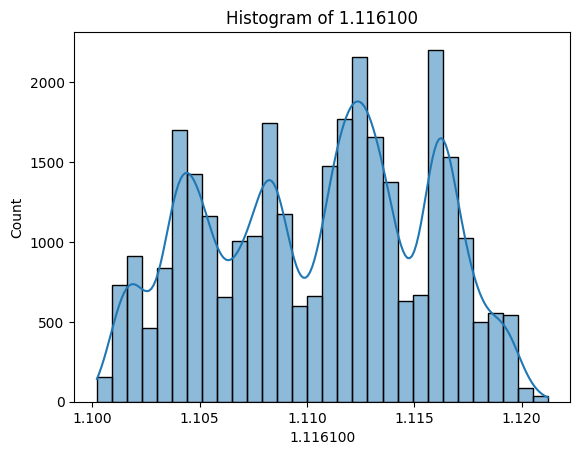

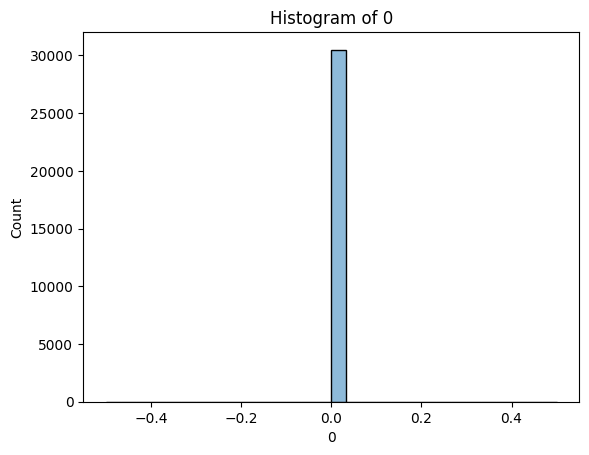

In [225]:
for col in numeric_columns:
    plt.figure()
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

In [226]:
# Plot correlation heatmap (exclude non-numeric columns)

In [227]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

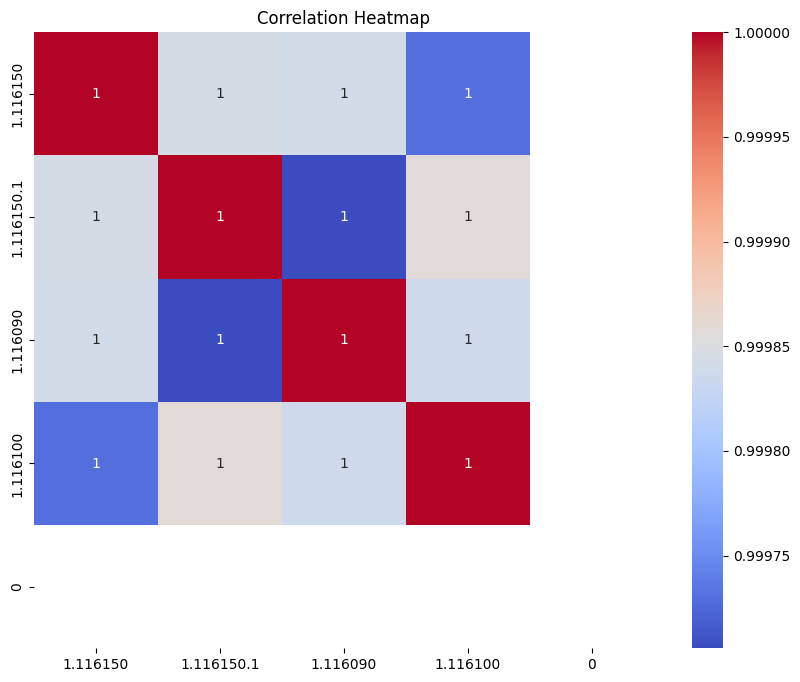

In [228]:
if not numeric_data.empty:
    correlation = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numeric columns available for correlation.")

In [229]:
# Plot scatter plots between the first numeric column and others

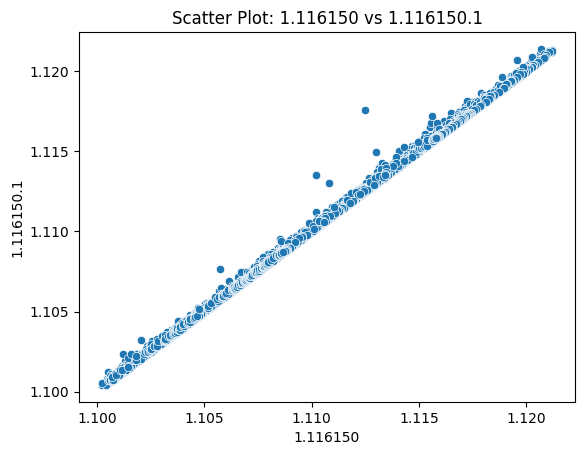

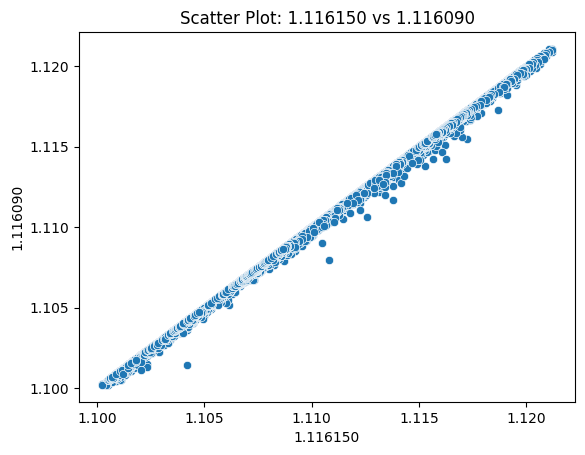

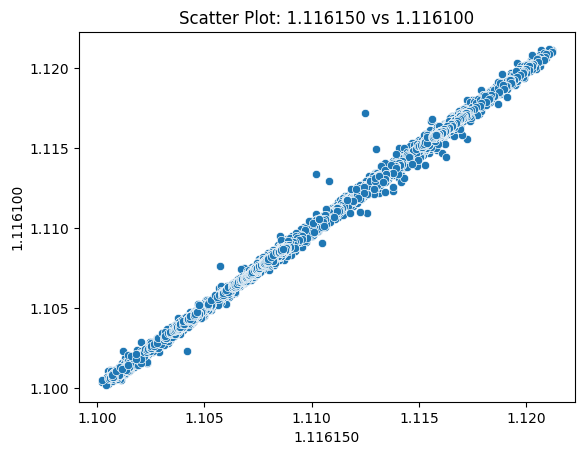

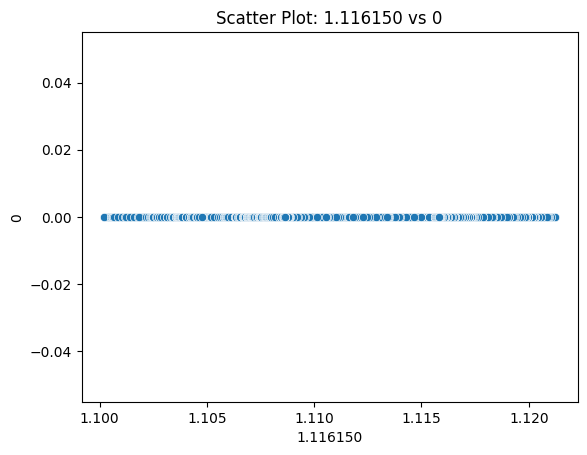

In [230]:
for col in numeric_columns:
    if col != numeric_columns[0]:  # Avoid plotting the same column against itself
        plt.figure()
        sns.scatterplot(x=data[numeric_columns[0]], y=data[col])
        plt.title(f"Scatter Plot: {numeric_columns[0]} vs {col}")
        plt.show()

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 🧹 **Step 4: Data Cleaning**

Data cleaning involves removing duplicate entries, handling missing values, and addressing outliers to ensure the dataset is ready for modeling.

- **Objective**: Clean the data by handling missing values, duplicates, and outliers.
- **What We Achieve**:
  - Cleaned dataset with no missing values or duplicates.
  - Outliers are removed to ensure that extreme values don't skew model training.

In [231]:
# Remove duplicates

In [232]:
data = data.drop_duplicates()

In [233]:
print("\nDuplicate Rows after removal:")
print(data.duplicated().sum(), "\n")


Duplicate Rows after removal:
0 



In [234]:
# We check the dataset info after removing the duplicates

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30486 entries, 0 to 30485
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2024.09.23  30486 non-null  object 
 1   00:00       30486 non-null  object 
 2   1.116150    30486 non-null  float64
 3   1.116150.1  30486 non-null  float64
 4   1.116090    30486 non-null  float64
 5   1.116100    30486 non-null  float64
 6   0           30486 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [236]:
# Handle missing values (if any, here just dropping for simplicity)

In [237]:
data = data.dropna()

In [238]:
print("\nMissing Values after removal:")
print(data.isnull().sum(), "\n")


Missing Values after removal:
2024.09.23    0
00:00         0
1.116150      0
1.116150.1    0
1.116090      0
1.116100      0
0             0
dtype: int64 



In [239]:
# We check the dataset info after solving for the missing values

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30486 entries, 0 to 30485
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2024.09.23  30486 non-null  object 
 1   00:00       30486 non-null  object 
 2   1.116150    30486 non-null  float64
 3   1.116150.1  30486 non-null  float64
 4   1.116090    30486 non-null  float64
 5   1.116100    30486 non-null  float64
 6   0           30486 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [241]:
# Outlier detection and removal (using IQR method)

In [242]:
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [243]:
print("\nData shape after outlier removal:", data.shape)


Data shape after outlier removal: (30486, 7)


In [244]:
# Inspect the dataset at this step

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30486 entries, 0 to 30485
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2024.09.23  30486 non-null  object 
 1   00:00       30486 non-null  object 
 2   1.116150    30486 non-null  float64
 3   1.116150.1  30486 non-null  float64
 4   1.116090    30486 non-null  float64
 5   1.116100    30486 non-null  float64
 6   0           30486 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# ⚙️ **Step 5: Data Scaling**

Scaling ensures that all features have similar ranges, which improves model performance. Standard scaling is applied to normalize the dataset.

- **Objective**: Scale numeric columns to have zero mean and unit variance.
- **What We Achieve**:
  - Ensured that all features are standardized to avoid models being affected by features with larger scales.

In [246]:
# Scale the dataset

In [247]:
scaler = StandardScaler()

In [248]:
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [249]:
# We inspect the dataset after scaling

In [250]:
data.head()

,2024.09.23,00:00,1.116150,1.116150.1,1.116090,1.116100,0
0,2024.09.23,00:01,1.125176,1.114041,1.120519,1.127350,0.0
1,2024.09.23,00:02,1.127171,1.124002,1.140488,1.137322,0.0
2,2024.09.23,00:03,1.139138,1.125994,1.148476,1.135328,0.0
3,2024.09.23,00:04,1.133155,1.122010,1.144482,1.135328,0.0
4,2024.09.23,00:05,1.137144,1.124002,1.148476,1.137322,0.0


In [251]:
# Save the processed dataset

In [252]:
data.to_csv("processed_forex_data.csv", index=False)

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 🤖 **Step 6: GAN Model Definition**

The architecture of the GAN consists of two parts: the generator and the discriminator. The generator creates synthetic data, and the discriminator evaluates it. Both are neural networks with dense layers and LeakyReLU activation functions.

- **Objective**: Define the architecture for the generator and discriminator.
- **What We Achieve**:
  - A generator that learns to produce synthetic data.
  - A discriminator that learns to distinguish real data from fake data.

In [253]:
# Load the preprocessed dataset

In [254]:
processed_data = pd.read_csv("processed_forex_data.csv")

In [255]:
# Inspect the dataset

In [256]:
print("Head of the dataset:")
print(processed_data.head())

Head of the dataset:
   2024.09.23  00:00  1.116150  1.116150.1  1.116090  1.116100    0
0  2024.09.23  00:01  1.125176    1.114041  1.120519  1.127350  0.0
1  2024.09.23  00:02  1.127171    1.124002  1.140488  1.137322  0.0
2  2024.09.23  00:03  1.139138    1.125994  1.148476  1.135328  0.0
3  2024.09.23  00:04  1.133155    1.122010  1.144482  1.135328  0.0
4  2024.09.23  00:05  1.137144    1.124002  1.148476  1.137322  0.0


In [257]:
print("\nInfo of the dataset:")
print(processed_data.info())


Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30486 entries, 0 to 30485
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2024.09.23  30486 non-null  object 
 1   00:00       30486 non-null  object 
 2   1.116150    30486 non-null  float64
 3   1.116150.1  30486 non-null  float64
 4   1.116090    30486 non-null  float64
 5   1.116100    30486 non-null  float64
 6   0           30486 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB
None


In [258]:
print("\nDescription of the dataset:")
print(processed_data.describe())


Description of the dataset:
           1.116150    1.116150.1      1.116090      1.116100        0
count  3.048600e+04  3.048600e+04  3.048600e+04  3.048600e+04  30486.0
mean  -5.742890e-15 -1.071012e-14  8.054962e-15  2.028657e-15      0.0
std    1.000016e+00  1.000016e+00  1.000016e+00  1.000016e+00      0.0
min   -2.042177e+00 -2.009743e+00 -2.036637e+00 -2.042026e+00      0.0
25%   -8.753621e-01 -8.741835e-01 -8.784138e-01 -8.771955e-01      0.0
50%    1.478445e-01  1.438353e-01  1.520052e-01  1.480147e-01      0.0
75%    7.741347e-01  7.853267e-01  7.710553e-01  7.743103e-01      0.0
max    2.148383e+00  2.169912e+00  2.132966e+00  2.148571e+00      0.0


In [259]:
# Drop datetime columns as they are not needed for GAN training

In [260]:
processed_data = processed_data.drop(columns=["2024.09.23", "00:00"])

In [261]:
# Normalize the data to a range [-1, 1] for better GAN performance

In [262]:
data = processed_data.values

In [263]:
data = (data - np.min(data)) / (np.max(data) - np.min(data)) * 2 - 1  # Scaling to [-1, 1]


In [264]:
# Ensure the data is of type float32

In [265]:
data = data.astype(np.float32)

In [266]:
# Define the generator model

In [267]:
def build_generator():
    model = Sequential()
    model.add(Dense(128, input_dim=data.shape[1], kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU(0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(data.shape[1], activation='tanh'))  # Output the same shape as the input data
    return model

In [268]:
# Define the discriminator model

In [269]:
def build_discriminator():
    model = Sequential()
    model.add(Dense(512, input_dim=data.shape[1], kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU(0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Output binary classification (real or fake)
    return model

In [270]:
# Define the GAN model (combined generator and discriminator)

In [271]:
def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 🛠️ **Step 7: Compiling the Models**

In this step, we compile both the discriminator and the combined GAN model. The discriminator is trained separately from the generator, but the combined model is used for training the generator.

- **Objective**: Compile the models with appropriate loss functions and optimizers.
- **What We Achieve**:
  - The discriminator is compiled with a binary cross-entropy loss function and Adam optimizer.
  - The combined GAN model is set up for training the generator while keeping the discriminator frozen.

In [272]:
# Build and compile the models

In [273]:
generator = build_generator()

In [274]:
discriminator = build_discriminator()

In [275]:
# Compile the discriminator

In [276]:
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])


In [277]:
# Compile the combined model (generator + discriminator)

In [278]:
discriminator.trainable = False

In [279]:
gan = build_gan(generator, discriminator)

In [280]:
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))


In [281]:
# Training parameters

In [282]:
epochs = 10

In [283]:
batch_size = 64

In [284]:
half_batch = batch_size // 2

In [285]:
# Lists to store losses for plotting

In [286]:
d_losses = []

In [287]:
g_losses = []

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 🏋️‍♂️ **Step 8: Training the Models**

Training a GAN involves an iterative process. The discriminator is trained on real and fake data, while the generator is trained through the combined model to improve its ability to generate realistic data.

- **Objective**: Train the discriminator and generator models.
- **What We Achieve**:
  - The discriminator becomes better at distinguishing real data from fake data.
  - The generator improves its ability to create more realistic synthetic data.

In [288]:
# Training loop

In [289]:
for epoch in range(epochs):
    # Train the discriminator with real and fake data
    idx = np.random.randint(0, data.shape[0], half_batch)
    real_data = data[idx]
    fake_data = generator.predict(np.random.randn(half_batch, data.shape[1]))

    # Train the discriminator (real: 1, fake: 0)
    d_loss_real = discriminator.train_on_batch(real_data, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator via the combined model (the discriminator is frozen)
    noise = np.random.randn(batch_size, data.shape[1])
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    print(f"{epoch + 1}/{epochs} | D Loss: {d_loss[0]} | D Accuracy: {d_loss[1] * 100}% | G Loss: {g_loss}")

    # Store losses for plotting
    d_losses.append(d_loss[0])
    g_losses.append(g_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/10 | D Loss: 0.6911392211914062 | D Accuracy: 85.15625% | G Loss: [array(0.69181937, dtype=float32), array(0.69181937, dtype=float32), array(0.703125, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/10 | D Loss: 0.6915582418441772 | D Accuracy: 71.35416269302368% | G Loss: [array(0.69180167, dtype=float32), array(0.69180167, dtype=float32), array(0.625, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/10 | D Loss: 0.6917415857315063 | D Accuracy: 64.68750238418579% | G Loss: [array(0.691891, dtype=float32), array(0.691891, dtype=float32), array(0.59375, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/10 | D Loss: 0.6917704343795776 | D Accuracy: 61.10491156578064% | G Loss: [array(0.6918845, dtype=float32), array(0.6918845, dtype=float32), array(0.5703125, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
5/10 | D Loss: 0.6917281746864319 | D Accuracy: 58.715277910232544% | G Loss: [array(0.6918291, dtype=float32), arr

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 📈 **Step 9: Model Evaluation and Loss Plotting**

During training, we monitor the losses of both the discriminator and the generator to assess model performance. We plot the losses for both models over epochs to ensure the training is progressing well.

- **Objective**: Monitor and visualize the loss of both the discriminator and generator.
- **What We Achieve**:
  - Track how both models improve during training.
  - Visualize if the GAN is converging or if there are issues during training.

In [290]:
# Plot the losses

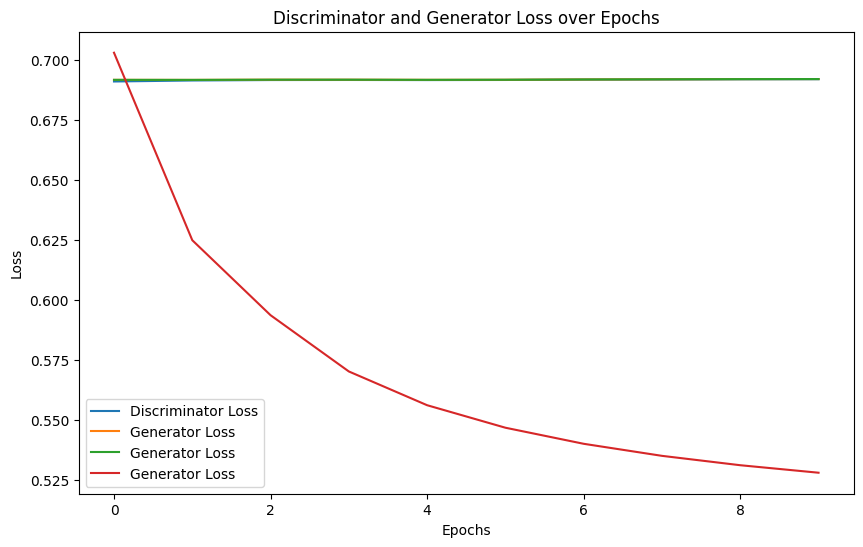

In [291]:
plt.figure(figsize=(10, 6))
plt.plot(d_losses, label="Discriminator Loss")
plt.plot(g_losses, label="Generator Loss")
plt.title("Discriminator and Generator Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 📝 **Step 10: Generating Synthetic Data**

After training the GAN, we use the generator to produce synthetic data that resembles the original dataset. This synthetic data can be used for further analysis or testing.

- **Objective**: Generate synthetic data using the trained generator.
- **What We Achieve**:
  - Generated realistic synthetic data that mimics the real Forex data.
  - This synthetic data can be used to augment the dataset or test trading strategies.

In [292]:
# Generate new synthetic data

In [293]:
synthetic_data = generator.predict(np.random.randn(1000, data.shape[1]))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [294]:
# Save the generated synthetic data as a CSV file

In [295]:
synthetic_data_df = pd.DataFrame(synthetic_data)  # Convert synthetic data to DataFrame


In [296]:
synthetic_data_df.to_csv("synthetic_forex_data.csv", index=False)  # Save to CSV


<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 🔄 **Step 11: Comparing Original and Generated Data**

To evaluate the quality of the generated data, we compare it visually with the original dataset. This helps determine how well the generator has learned to replicate the data distribution.

- **Objective**: Compare synthetic data to original data.
- **What We Achieve**:
  - Visual confirmation of how closely the synthetic data matches the real data.
  - Insights into how well the GAN has been trained and if further fine-tuning is needed.

In [297]:
# Plot the generated data vs the original data (for comparison)

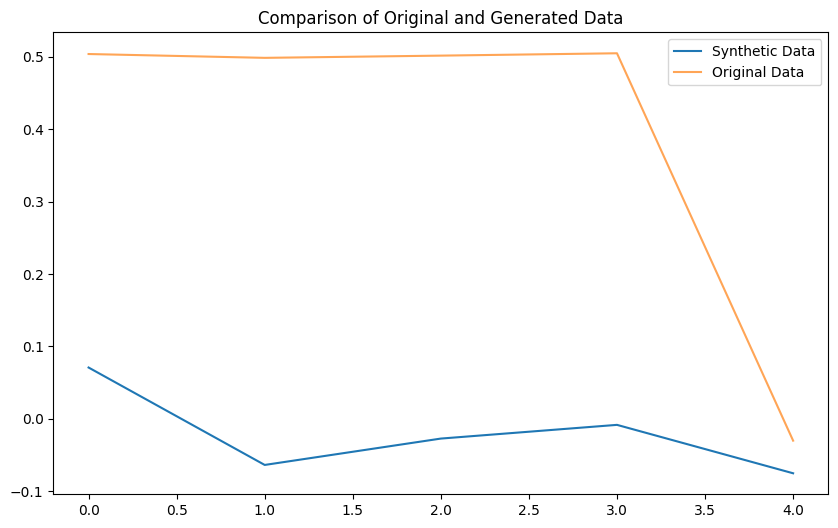

In [298]:
plt.figure(figsize=(10, 6))
plt.plot(synthetic_data[0], label="Synthetic Data")
plt.plot(data[0], label="Original Data", alpha=0.7)
plt.legend()
plt.title("Comparison of Original and Generated Data")
plt.show()

<hr style="border: 1px solid purple;">

<hr style="border: 1px solid purple;">

# 🏁 **Conclusion**

In this project, we implemented a Generative Adversarial Network (GAN) to generate synthetic Forex trading data, which can be used for backtesting trading strategies, augmenting existing datasets, or testing financial models. The key steps involved were:

1. **Data Preprocessing**:
   - Loaded the Forex data and conducted an initial exploration.
   - Cleaned the data by removing duplicates, handling missing values, and addressing outliers.
   - Scaled the data to prepare it for modeling.

2. **GAN Architecture**:
   - Defined a generator to create synthetic data and a discriminator to differentiate between real and fake data.
   - Compiled both models with appropriate loss functions and optimizers for training.

3. **Training the Models**:
   - Trained the GAN iteratively, updating the discriminator and generator to improve the realism of the generated data.
   - Monitored the training process using loss metrics.

4. **Model Evaluation**:
   - Evaluated the GAN's performance by comparing the original and generated data.
   - Plotted losses to track model convergence.

5. **Results**:
   - Successfully generated synthetic Forex data that closely mimics the original data distribution.
   - The synthetic data can now be used for various applications like augmenting trading datasets or testing trading strategies without exposing sensitive real data.

### Key Takeaways:
- **Data Augmentation**: GANs can be a powerful tool for generating synthetic data, especially in finance where real data might be scarce or sensitive.
- **Model Evaluation**: Visual comparisons and loss tracking are essential for ensuring the GAN is training correctly and generating high-quality data.
- **Applications**: The synthetic data can be used for backtesting strategies, training machine learning models, or enhancing financial data privacy.

This project demonstrates how to effectively apply GANs to generate synthetic data for financial applications and how to evaluate the quality of the generated data to ensure its usefulness in real-world scenarios.

<hr style="border: 3px solid purple;">
<hr style="border: 3px solid purple;">